In [ ]:
!pip install PyPDF2 wordcloud pandas matplotlib python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 5.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
import re
from bs4 import BeautifulSoup
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import os
import PyPDF2
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [ ]:
# def extract_text_from_pdfs_in_folder(folder_path):
#     combined_text = ""
#     pdf_files = [file for file in os.listdir(folder_path) if file.lower().endswith('.pdf')]

#     for pdf_file in pdf_files:
#         pdf_path = os.path.join(folder_path, pdf_file)
#         with open(pdf_path, 'rb') as file:
#             reader = PyPDF2.PdfReader(file)
#             for page in reader.pages:
#                 combined_text += page.extract_text()
#     return combined_text

# folder_path = "/content/drive/MyDrive/DS Project  -  Green_Software papers/All Papers"
# pdf_text = extract_text_from_pdfs_in_folder(folder_path)

# นำเข้าข้อมูล , filter เอาแค่ที่ไม่มีคำตอบ

In [ ]:
clean_bq = pd.read_csv('/content/drive/MyDrive/DS Project  -  Green_Software papers/Posts from keyword/Visualize Data Set/cleaned_bigquery_final.csv', index_col=0)
clean_bq

,title,post_body,owner_username,tags,view_count,favourite_count,post_score,creation_date,last_activity_date,answer_count,...,answer_create_date_time,comment_create_date_day,comment_create_date_month,comment_create_date_year,comment_create_date_time,answer_last_activity_day,answer_last_activity_month,answer_last_activity_year,answer_last_activity_time,answer_id
0,Acquiring GPS data from mobile browser,<p>I'm working on a project where I'm supposed...,Kevin Zero,browser|background|refresh,77,0,-1,"April 22, 2015, 09:51:53","April 24, 2015, 14:53:47",1,...,14:53:47,0,0,0,0,24,4,2015,14:53:47,29850726.0
1,"Activity, service or fragment?",<p>I am writing an app which needs to monitor ...,Saurabh Kumar,android|performance|android-intent|android-fra...,126,0,0,"August 28, 2013, 01:32:27","August 28, 2013, 03:07:58",1,...,03:07:58,28,8,2013,08:25:35,28,8,2013,03:07:58,18478749.0
2,ActivityRecognitionAPI keeps sending pending i...,"<p>I am using <a href=""https://developers.goog...",Max Testing,android|activity-recognition,104,0,0,"June 02, 2015, 00:10:42","June 29, 2015, 18:23:08",1,...,18:23:08,0,0,0,0,29,6,2015,18:23:08,31122855.0
3,AlarmManager RTC_WAKEUP drains battery,<p>I have a service running in the background ...,user2189878,android|android-service|alarmmanager,794,1,1,"May 02, 2016, 07:31:48","July 19, 2017, 11:54:12",1,...,08:30:23,0,0,0,0,19,7,2017,11:54:12,36978171.0
4,AlarmManager with notification not firing,<p>I'm making an app with a persistent notific...,Calvin Li,android|android-studio|alarmmanager|android-no...,754,0,1,"March 12, 2015, 23:36:37","March 13, 2015, 07:02:58",1,...,07:02:58,0,0,0,0,13,3,2015,07:02:58,29026582.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,smart phone bratinger app,<p>I want to make an android application that ...,Mariam,android,70,0,1,"October 08, 2012, 12:42:39","October 08, 2012, 13:02:14",2,...,12:55:32,8,10,2012,18:00:55,8,10,2012,12:55:32,12782209.0
936,smart phone bratinger app,<p>I want to make an android application that ...,Mariam,android,70,0,1,"October 08, 2012, 12:42:39","October 08, 2012, 13:02:14",2,...,13:02:14,0,0,0,0,8,10,2012,13:02:14,12782319.0
937,startMonitoringSignificantLocationChanges call...,<p><code>startMonitoringSignificantLocationCha...,Gauri Shankar,ios|objective-c|cllocationmanager,344,0,1,"June 02, 2015, 07:29:07","June 02, 2015, 07:43:39",1,...,07:43:39,0,0,0,0,2,6,2015,07:43:39,30590222.0
938,"swift iOS , location manager startUpdatingLoca...",<p>I would like to start updating the location...,StephanD,ios|swift|location,287,1,2,"December 02, 2016, 22:18:42","December 02, 2016, 22:18:42",0,...,0,0,0,0,0,0,0,0,0,NaN


Unanswered

In [ ]:
clean_bq = df_final.drop_duplicates(subset=['title'], keep='first')
selected_columns = clean_bq[['answer_count', 'post_body', 'Cluster']]
Unanswered = selected_columns[selected_columns['answer_count']== 0]
Unanswered

,answer_count,post_body,Cluster
6,0,In my Android application I want to display a ...,0
8,0,in my application i need to track the position...,2
10,0,I am building a game where i do some things in...,0
17,0,I need to read all the device sensors in my ap...,0
18,0,Question Since there is only one WakeLock left...,0
...,...,...,...
832,0,In my application I used the widget creation c...,0
859,0,Im building an app that has a gauge view with ...,0
909,0,Im using location background mode but that mak...,2
938,0,I would like to start updating the location di...,2


Answered

In [ ]:
selected_columns = clean_bq[['answer_count', 'accepted_answer', 'post_body', 'Cluster']]
Answered = selected_columns[(selected_columns['answer_count'] > 0) & (selected_columns['accepted_answer'] == 'None')]
Answered

,answer_count,accepted_answer,post_body,Cluster
0,1,None,Im working on a project where Im supposed to g...,2
1,1,None,I am writing an app which needs to monitor the...,0
2,1,None,I am using ActivityRecognitionAPI in Android t...,0
3,1,None,I have a service running in the background whi...,0
4,1,None,Im making an app with a persistent notificatio...,0
...,...,...,...,...
911,1,None,I write app for use in auto which works in bac...,2
912,2,None,Im developing a localization app that runs in ...,2
915,4,None,I have created an Android service which basica...,0
928,1,None,I need to keep track of the user location all ...,2


Accepted Answer

In [ ]:
Accepted_Answer = selected_columns[(selected_columns['answer_count'] > 0) & (selected_columns['accepted_answer'] != 'None')]
Accepted_Answer

,answer_count,accepted_answer,post_body,Cluster
9,1,63956018.0,I am developing a game for Android It uses a s...,0
11,2,3122536.0,My app checks at a specific time whether a use...,2
20,3,53366624.0,Ive been working on an android game for awhile...,0
41,2,5859542.0,I am looking for reading resources or sample a...,1
46,1,11925553.0,I am building an Android App that will communi...,1
...,...,...,...,...
923,1,49285061.0,I have an app built in ReactNative that is dra...,2
930,2,7717299.0,I had previously coded an app with a location ...,2
933,1,11497565.0,need a service that will run in background and...,2
935,2,12782209.0,I want to make an android application that whe...,2


In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# ฟังก์ชันทำความสะอาดข้อความ
def clean_html_and_code(text):
    if not isinstance(text, str):  # ป้องกันข้อผิดพลาดจากค่า NaN หรือ non-string
        return ""

    # ลบโค้ดทั้งหมดรวมถึงข้อความภายในโค้ด
    text = re.sub(r"<code.*?>.*?</code>", "", text, flags=re.DOTALL)
    text = re.sub(r"```.*?```", "", text, flags=re.DOTALL)

    # ใช้ BeautifulSoup ลบแท็ก HTML
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()

    # ลบสัญลักษณ์พิเศษ HTML เช่น &amp;, &lt; เป็นต้น
    text = re.sub(r"&[a-z]+;", "", text)

    # ลบตัวเลขทั้งหมด
    text = re.sub(r"\d+", "", text)

    # ลบสัญลักษณ์ที่ไม่จำเป็น
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # ลบช่องว่างเกินมา
    text = re.sub(r"\s+", " ", text).strip()

    # Tokenization
    words = word_tokenize(text.lower())

    # กำหนด stopwords
    additional_del_words = {'drain', 'battery', 'android'}   #ลบออกเอง
    nlstopwords = set(nltk.corpus.stopwords.words('english'))
    additional_stopwords = nlstopwords.union({
        'also', 'use', 'could', 'many', 'first', 'make', 'work', 'find', 'great', 'would', 'useful',
        'research', 'ieee', 'paper', 'papers', 'e', 'de', 'le', 'pro', 'used', 'licensed', 'vol', 'chiang', 'mai',
        'university', 'proc', 'int', 'l', 'provided', 'uninet', 'downloaded', 'limited', 'utc', 'xplore',
        'restrictions', 'authorized', 'december', 'pp', 'al', 'et', 'https', 'conference', 'accessed', 'almost',
        'sometimes', 'often', 'always', 'september', 'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'October', 'November', 'online', 'http', 'available', 'shown', 'fig', 'study',
        'receive', 'accepted', 'using'
    }).union(additional_del_words)

    stopwords = set(nlstopwords) | additional_stopwords

    # ลบ stop words
    filtered_words = [word for word in words if word not in stopwords]

    # Word Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return " ".join(lemmatized_words)

In [ ]:
def generate_wordcloud(freq, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords = set(nltk.corpus.stopwords.words('english')) | set(ENGLISH_STOP_WORDS)

Cluster 2 - Top 10 Unigrams:
[('location', 477), ('app', 240), ('user', 178), ('gps', 166), ('update', 135), ('background', 134), ('service', 110), ('im', 103), ('time', 99), ('application', 86)]

Cluster 2 - Top 10 Bigrams:
[('location update', 61), ('user location', 42), ('location service', 42), ('significant location', 29), ('location change', 28), ('gps location', 18), ('current location', 17), ('location manager', 16), ('dont want', 15), ('update location', 15)]

Cluster 2 - Top 10 Trigrams:
[('significant location change', 15), ('significant location monitoring', 10), ('google play service', 9), ('app running background', 7), ('background location update', 7), ('user current location', 5), ('track user location', 5), ('user location background', 5), ('standard location service', 5), ('fused location provider', 5)]


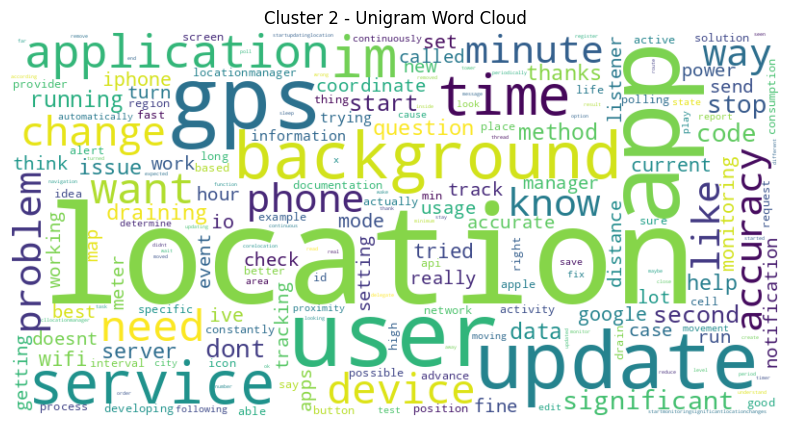

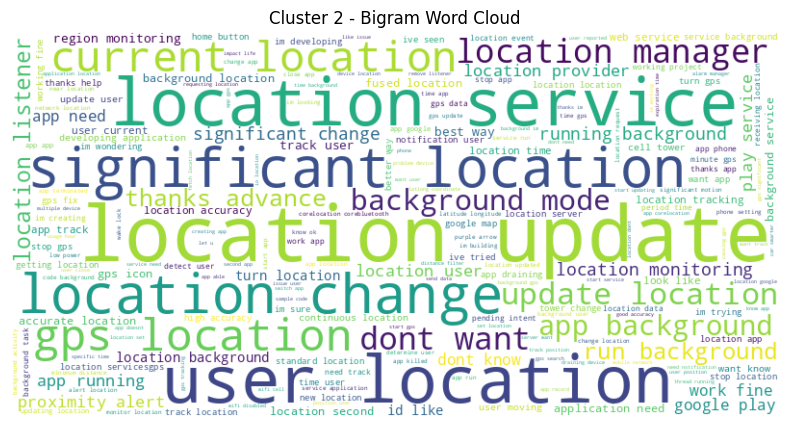

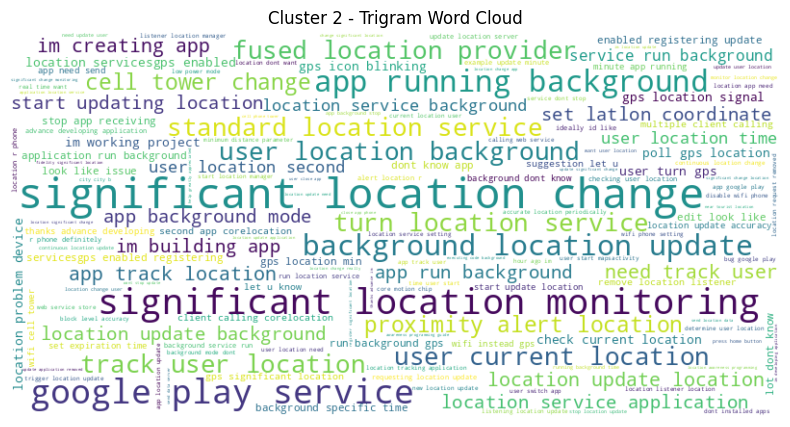

Cluster 0 - Top 10 Unigrams:
[('app', 351), ('service', 179), ('time', 111), ('device', 106), ('screen', 105), ('application', 104), ('phone', 99), ('way', 96), ('running', 92), ('user', 89)]

Cluster 0 - Top 10 Bigrams:
[('wake lock', 21), ('dont know', 15), ('background service', 15), ('app running', 15), ('service run', 15), ('broadcast receiver', 14), ('running background', 13), ('best way', 12), ('thanks advance', 12), ('app need', 11)]

Cluster 0 - Top 10 Trigrams:
[('partial wake lock', 6), ('deep sleep mode', 4), ('google play service', 3), ('im developing application', 3), ('measure power consumption', 3), ('im working app', 3), ('service run background', 3), ('app running left', 3), ('long period time', 3), ('lock screen app', 3)]


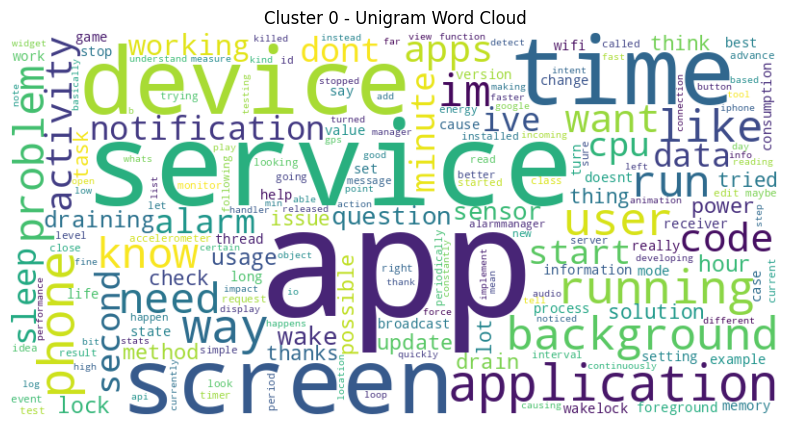

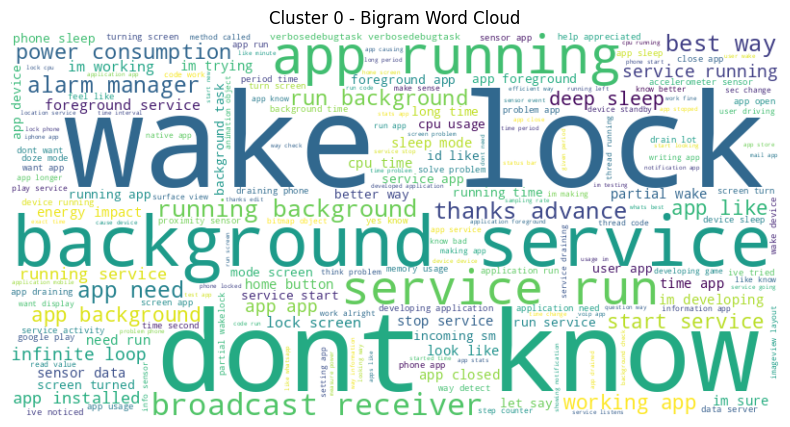

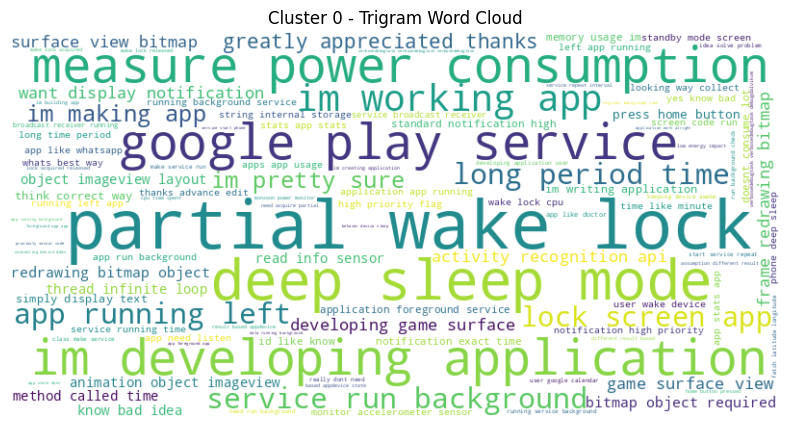

Cluster 1 - Top 10 Unigrams:
[('server', 85), ('device', 85), ('app', 81), ('connection', 64), ('data', 58), ('service', 57), ('im', 50), ('message', 44), ('time', 44), ('way', 43)]

Cluster 1 - Top 10 Bigrams:
[('push notification', 15), ('new message', 13), ('send data', 9), ('best way', 8), ('app background', 7), ('im sure', 7), ('server client', 6), ('real time', 6), ('connection server', 5), ('data server', 5)]

Cluster 1 - Top 10 Trigrams:
[('partial wake lock', 4), ('usb host mode', 3), ('know best way', 3), ('listening incoming connection', 3), ('connection server client', 2), ('send data server', 2), ('server send data', 2), ('thank im trying', 2), ('data come anytime', 2), ('host mode api', 2)]


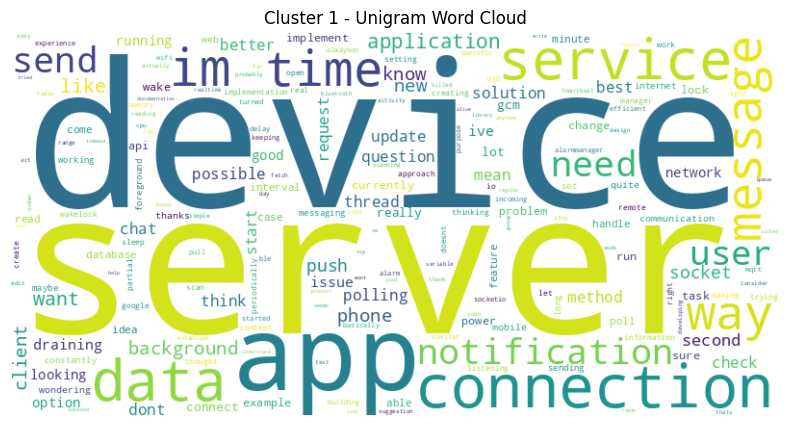

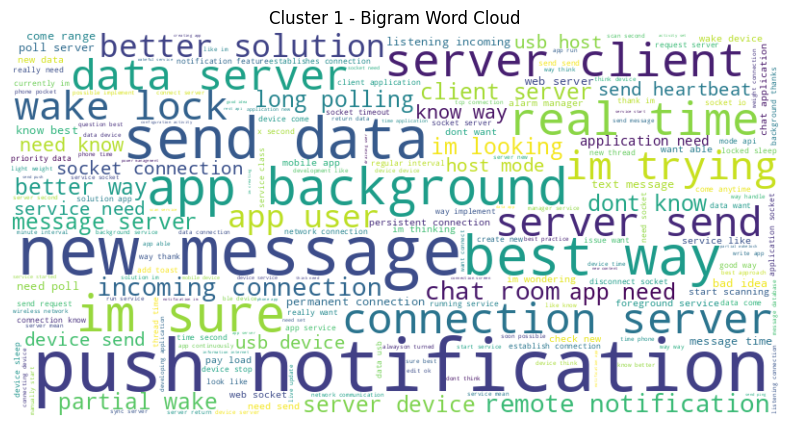

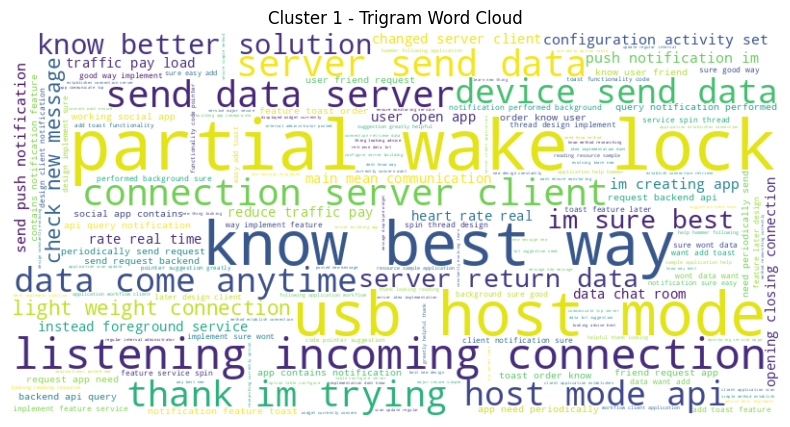

In [ ]:
clusters = Unanswered["Cluster"].unique()
clusters = Answered["Cluster"].unique()
clusters = Accepted_Answer["Cluster"].unique()
for cluster in clusters:
    # **ทำความสะอาดข้อความก่อนนำไปใช้**
    text = " ".join(clean_bq[clean_bq["Cluster"] == cluster]["post_body"].apply(clean_html_and_code))

    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stopwords]

    # สร้าง N-grams
    unigrams = list(ngrams(filtered_tokens, 1))
    bigrams = list(ngrams(filtered_tokens, 2))
    trigrams = list(ngrams(filtered_tokens, 3))

    # นับความถี่ของคำ
    unigram_freq = Counter([' '.join(gram) for gram in unigrams])
    bigram_freq = Counter([' '.join(gram) for gram in bigrams])
    trigram_freq = Counter([' '.join(gram) for gram in trigrams])

    # แสดง Top 10 คำที่พบบ่อย
    print(f"Cluster {cluster} - Top 10 Unigrams:")
    print(unigram_freq.most_common(10))
    print(f"\nCluster {cluster} - Top 10 Bigrams:")
    print(bigram_freq.most_common(10))
    print(f"\nCluster {cluster} - Top 10 Trigrams:")
    print(trigram_freq.most_common(10))

    # แสดง Word Cloud
    generate_wordcloud(unigram_freq, f'Cluster {cluster} - Unigram Word Cloud')
    generate_wordcloud(bigram_freq, f'Cluster {cluster} - Bigram Word Cloud')
    generate_wordcloud(trigram_freq, f'Cluster {cluster} - Trigram Word Cloud')

In [ ]:
# import pandas as pd

In [ ]:
# df = pd.read_csv('/content/Data_query.csv')

In [ ]:
# df.drop_duplicates(subset =['title'], keep= 'first', inplace=True)
# df